In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
dataset = pd.read_csv("gen_train.csv")
dataset.index = dataset["Unnamed: 0"]
dataset = dataset.drop(["Unnamed: 0"], axis=1)
dataset.index.name="Date"
dataset

,Energy_Generated_KWh,Temperature_C,apparent_zenith,azimuth,poa_global
Date,,,,,
2012-01-01,4.261358,19.012714,106.996890,110.484688,1420.452739
2012-01-02,4.007858,25.117008,107.094981,110.387431,1335.952785
2012-01-03,3.949377,24.858675,107.190916,110.282394,1316.459144
2012-01-04,4.133708,23.235063,107.284590,110.169622,1377.902763
2012-01-05,4.294925,22.250238,107.375902,110.049165,1431.641681
...,...,...,...,...,...
2016-12-27,4.067669,20.830518,106.559524,110.806436,1355.889754
2016-12-28,4.025891,19.048137,106.665553,110.742434,1341.963562
2016-12-29,4.008596,18.693257,106.769985,110.670488,1336.198646


In [42]:
import tensorflow as tf
tf.random.set_seed(42)
np.random.seed(42)
temp_noise = np.random.normal(0,2,len(dataset["Temperature_C"]))
dataset["Temperature_C"] += temp_noise
x_train = dataset[["Temperature_C","apparent_zenith", "azimuth", "poa_global"]][:1400]
y_train = dataset["Energy_Generated_KWh"][:1400]

x_validation = dataset[["Temperature_C","apparent_zenith", "azimuth", "poa_global"]][1400:]
y_validation = dataset["Energy_Generated_KWh"][1400:]

x_train = np.reshape(x_train.values, (x_train.shape[0], x_train.shape[1], 1))
x_validation = np.reshape(x_validation.values, (x_validation.shape[0], x_validation.shape[1], 1))


x_train.shape, y_train.shape, x_validation.shape, y_validation.shape

((1400, 4, 1), (1400,), (427, 4, 1), (427,))

In [17]:
import keras
from keras.layers import LSTM, Dense, BatchNormalization, Dropout, RNN, GRU
from keras.models import Sequential

In [45]:
model = Sequential()
model.add(LSTM(units=32, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(LSTM(units=32))
model.add(BatchNormalization())
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(x_train, y_train, epochs = 23, batch_size = 64)

Epoch 1/23


2024-03-09 23:38:17.429839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-09 23:38:17.601313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-09 23:38:17.724251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-09 23:38:17.987065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/22 [>.............................] - ETA: 35s - loss: 16.6697

2024-03-09 23:38:18.220324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 3s 48ms/step - loss: 15.6119
Epoch 2/23
22/22 [==============================] - 0s 19ms/step - loss: 14.1758
Epoch 3/23
22/22 [==============================] - 0s 18ms/step - loss: 12.6488
Epoch 4/23
22/22 [==============================] - 0s 15ms/step - loss: 10.8907
Epoch 5/23
22/22 [==============================] - 0s 16ms/step - loss: 8.9553
Epoch 6/23
22/22 [==============================] - 0s 14ms/step - loss: 6.9608
Epoch 7/23
22/22 [==============================] - 0s 14ms/step - loss: 5.0686
Epoch 8/23
22/22 [==============================] - 0s 14ms/step - loss: 3.4222
Epoch 9/23
22/22 [==============================] - 0s 14ms/step - loss: 2.1130
Epoch 10/23
22/22 [==============================] - 0s 13ms/step - loss: 1.1780
Epoch 11/23
22/22 [==============================] - 0s 14ms/step - loss: 0.5907
Epoch 12/23
22/22 [==============================] - 0s 13ms/step - loss: 0.2617
Epoch 13/23
22/22 [=========================

In [34]:
test_ds = pd.read_csv("gen_test.csv")
test_ds.index = test_ds["Unnamed: 0"]
test_ds = test_ds.drop(["Unnamed: 0"], axis=1)
test_ds.index.name="Date"
test_ds

,Energy_Generated_KWh,Temperature_C,apparent_zenith,azimuth,poa_global
Date,,,,,
2017-01-01,4.007282,21.249524,107.072437,110.407309,1335.760566
2017-01-02,4.203925,21.712081,107.169217,110.303927,1401.308206
2017-01-03,3.990615,22.009777,107.263767,110.192788,1330.205102
2017-01-04,3.881347,19.706018,107.355967,110.073943,1293.782200
2017-01-05,3.899089,22.586323,107.445699,109.947445,1299.696243
...,...,...,...,...,...
2019-12-27,3.908926,22.439689,106.479178,110.850240,1302.975443
2019-12-28,3.900219,26.837200,106.586441,110.792084,1300.073031
2019-12-29,4.270040,21.579329,106.692138,110.725965,1423.346810


In [35]:
x_test = test_ds[["Temperature_C","apparent_zenith", "azimuth", "poa_global"]]
y_test = test_ds["Energy_Generated_KWh"]


x_test = np.reshape(x_test.values, (x_test.shape[0], x_test.shape[1], 1))

x_test.shape, y_test.shape

((1095, 4, 1), (1095,))

In [8]:
max(test_ds["Energy_Generated_KWh"])

4.554309381805179

2024-03-09 23:38:31.705395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-09 23:38:31.774304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-09 23:38:31.841087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 1s 8ms/step


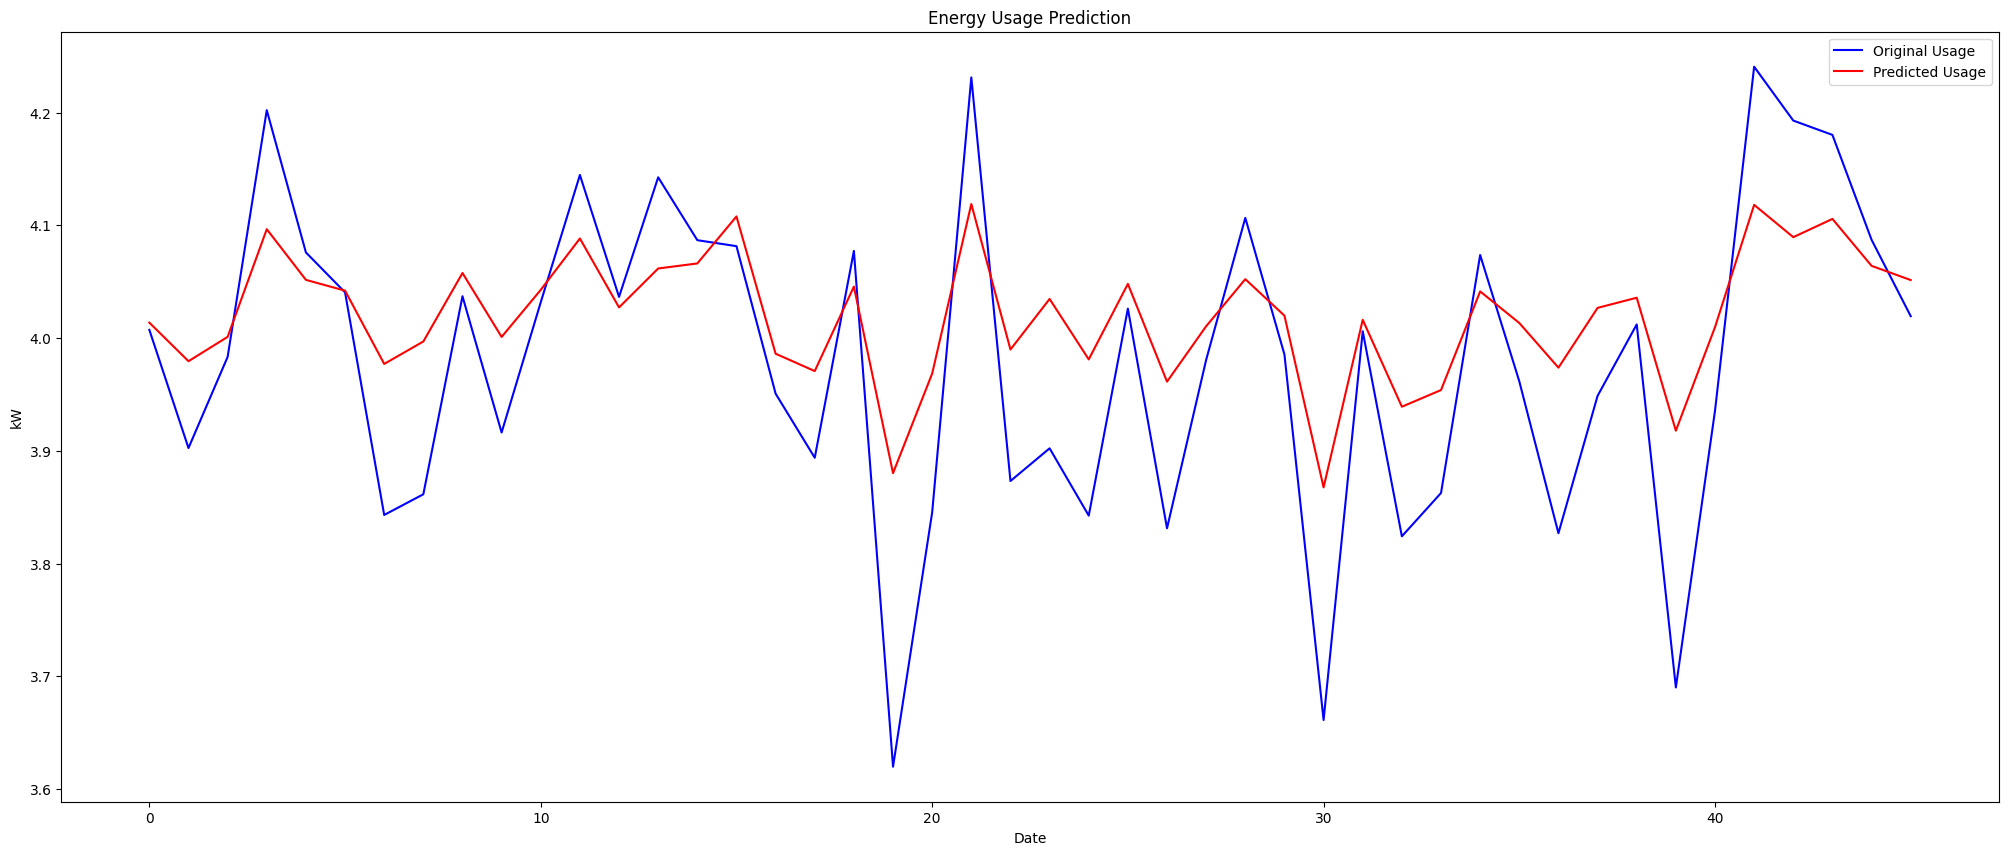

In [46]:
predictions = model.predict(x_test)
plt.figure(figsize=(25,10))
plt.plot(y_test.values[::24], color='blue', label='Original Usage')
plt.plot(predictions[:,0][::24] , color='red', label='Predicted Usage')
plt.title('Energy Usage Prediction')
plt.xlabel('Date')
plt.ylabel('kW')
plt.legend()
plt.show()

In [47]:
model.save("best2.h5")

/Users/gunachowdary/miniconda/envs/course_repo/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
